In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
values_df = pd.read_csv("values.csv", sep=",")
# randomize data
values_df = values_df.reindex(np.random.permutation(values_df.index))

values_df.head()

,Unnamed: 0,From,To,Value
345,345,northvirginia_aws,paris_aws,0.0000
131,131,ohio_aws,london_google,0.0000
437,437,london_google,singapore_aws,0.1587
353,353,seoul_aws,paris_aws,0.2014
475,475,singapore_google,singapore_google,1.0000


In [11]:
df = values_df.pivot(index="From", columns="To", values="Value")
trX = df.values
trX.shape

(24, 24)

In [12]:
df

To,central_aws,frankfurt_aws,frankfurt_google,ireland_aws,london_aws,london_google,mumbai_aws,mumbai_google,northcalifornia_aws,northvirginia_aws,...,paris_aws,saopaulo_aws,saopaulo_google,seoul_aws,singapore_aws,singapore_google,sydney_aws,sydney_google,tokyo_aws,tokyo_google
From,,,,,,,,,,,,,,,,,,,,,
central_aws,1.0000,0.4151,0.0000,0.4486,0.3986,0.0000,0.2769,0.0000,0.4286,0.6295,...,0.4292,0.3835,0.0000,0.2987,0.2504,0.0000,0.2618,0.0000,0.3349,0.0000
frankfurt_aws,0.4266,1.0000,0.9096,0.6227,0.6694,0.6053,0.3891,0.0759,0.3361,0.4606,...,0.6708,0.2424,0.2441,0.1932,0.3299,0.1388,0.1598,0.1646,0.2187,0.2127
frankfurt_google,0.0000,0.8140,1.0000,0.0000,0.5994,0.8098,0.2038,0.0676,0.0000,0.4174,...,0.0000,0.2268,0.2296,0.0000,0.1416,0.1572,0.1466,0.1733,0.2068,0.2424
ireland_aws,0.4508,0.5834,0.0000,1.0000,0.5836,0.0000,0.3752,0.0000,0.3378,0.4298,...,0.5272,0.2977,0.0000,0.1955,0.3098,0.0000,0.1774,0.0000,0.2447,0.0000
london_aws,0.4372,0.6550,0.6205,0.7478,1.0000,0.9988,0.3836,0.0829,0.3479,0.4674,...,0.7122,0.2568,0.2670,0.1904,0.3316,0.1690,0.1660,0.1862,0.2328,0.2530
london_google,0.0000,0.5166,0.5426,0.0000,0.9433,1.0000,0.2038,0.0892,0.0000,0.4402,...,0.0000,0.2428,0.2458,0.0000,0.1587,0.1730,0.1610,0.1927,0.2204,0.2418
mumbai_aws,0.2742,0.3951,0.2198,0.3800,0.3910,0.2220,1.0000,0.9528,0.2050,0.2954,...,0.4082,0.1106,0.0588,0.3388,0.4830,0.4674,0.2008,0.3230,0.3584,0.3698
mumbai_google,0.0000,0.0569,0.0772,0.0000,0.0730,0.0912,0.9186,1.0000,0.0000,0.1574,...,0.0000,0.0154,0.0142,0.0000,0.4843,0.4852,0.3114,0.3688,0.3406,0.3650
northcalifornia_aws,0.4558,0.3475,0.0000,0.3469,0.3638,0.0000,0.2098,0.0000,1.0000,0.4918,...,0.3695,0.2769,0.0000,0.3618,0.3119,0.0000,0.3456,0.0000,0.4026,0.0000


In [13]:
visible_units = 24
hidden_units = 24
vb = tf.placeholder('float', [visible_units])
hb = tf.placeholder('float', [hidden_units])
W = tf.placeholder('float', [visible_units, hidden_units])

In [14]:
# 1. Forward pass
v0 =tf.placeholder('float', [None, visible_units])
_h0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

# 2. Backward pass (reconstruction)
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb)
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [15]:
# learning rate
alpha = 0.5
# gradients
w_pos_grad = tf.matmul(tf.transpose(v0),h0)
w_neg_grad = tf.matmul(tf.transpose(v1),h1)
# Contrastive divergence
CD = (w_pos_grad - w_neg_grad)/tf.to_float(tf.shape(v0)[0])
# update weights and biases
update_w = W + alpha*CD
update_vb = vb + alpha * tf.reduce_mean(v0-v1, 0) 
update_hb = hb + alpha * tf.reduce_mean(h0-h1, 0)

In [16]:
# error function set as Mean Absolute Error Function
error = v0 - v1
errors_sum = tf.reduce_mean(error*error)

In [17]:
# initialize variables
curr_w = np.zeros([visible_units, hidden_units], np.float32)
curr_vb = np.zeros([visible_units], np.float32)
curr_hb = np.zeros([hidden_units], np.float32)

prev_w = np.zeros([visible_units, hidden_units], np.float32)
prev_vb = np.zeros([visible_units], np.float32)
prev_hb = np.zeros([hidden_units], np.float32)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

0.27031183
0.25563267
0.25560176
0.25016218
0.21470906
0.22675487
0.22818476
0.234816
0.23277432
0.25058857
0.2209472
0.23480208
0.21375974
0.21518092
0.22167327
0.21066737
0.23245382
0.2066167
0.21071355
0.22123197
0.19507743
0.21555592
0.20199029
0.20288509
0.20282012
0.22164863
0.2198493
0.19414791
0.20994584
0.20360418
0.20667118
0.2128889
0.18960868
0.18793748
0.18666631
0.21159202
0.21238197
0.19222641
0.19003646
0.2062073
0.18643995
0.1940066
0.2145858
0.18036284
0.22054061
0.21159445
0.1820882
0.18630312
0.19977638
0.19831909
0.18359548
0.19231217
0.19828229
0.20873576
0.19096562
0.20765866
0.21374862
0.18750036
0.21095173
0.21512015
0.20171387
0.19115275
0.20597535
0.18223089
0.19575694
0.19169272
0.19545728
0.21165
0.20927256
0.20481496
0.19662118
0.19038403
0.21776007
0.2039184
0.19122154
0.1990052
0.20544444
0.19859895
0.17995556
0.16546077
0.18274549
0.20327953
0.21203297
0.18000346
0.18646075
0.18512987
0.18667638
0.18363437
0.17804444
0.17804931
0.17870763
0.19023229
0.2

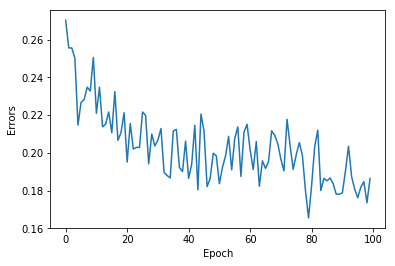

In [18]:
epochs = 100
batch_size = 4
errors = []
for epoch in range(epochs):
    for start, end in zip(range(0, len(trX), batch_size), range (batch_size, len(trX), batch_size)):
        data = trX[start:end]
        curr_w = sess.run(update_w, feed_dict={v0: data, W: prev_w, vb:prev_vb, hb:prev_hb})
        curr_hb = sess.run(update_hb, feed_dict={v0: data, W: prev_w, vb:prev_vb, hb:prev_hb})
        curr_vb = sess.run(update_vb, feed_dict={v0: data, W: prev_w, vb:prev_vb, hb:prev_hb})
    
        prev_w = curr_w
        prev_vb = curr_vb
        prev_hb = curr_hb
        
    errors.append(sess.run(errors_sum, feed_dict={v0: trX, W: curr_w, vb: curr_vb, hb: curr_hb}))
    print(errors[-1])

plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()

In [26]:
#selecting input
input = trX[2].reshape(1,-1)
input[0]

array([0.    , 0.814 , 1.    , 0.    , 0.5994, 0.8098, 0.2038, 0.0676,
       0.    , 0.4174, 0.4246, 0.    , 0.3326, 0.3586, 0.    , 0.2268,
       0.2296, 0.    , 0.1416, 0.1572, 0.1466, 0.1733, 0.2068, 0.2424])

In [27]:
# Feeding in the datacenter and reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0,W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W))+vb)
feed = sess.run(hh0, feed_dict={v0:input,W:curr_w,hb:curr_hb})
rec = sess.run(vv1, feed_dict={hh0:feed, W:curr_w, vb:curr_vb})

In [28]:
rec[0]

array([0.0194179 , 0.39639243, 0.513898  , 0.02375474, 0.40247288,
       0.6062264 , 0.2581541 , 0.09637723, 0.01425477, 0.45399356,
       0.6120925 , 0.01050246, 0.4238704 , 0.46056917, 0.05997138,
       0.21177655, 0.32881528, 0.00630122, 0.29877347, 0.33485842,
       0.2241516 , 0.28531614, 0.2343429 , 0.31931096], dtype=float32)

In [29]:
# list all the recommended dc in descending order
datacenter_df = pd.read_csv('Datacenters.csv',sep=',')
datacenter_df.head()

,DataCenterId,Name
0,0,central_aws
1,1,frankfurt_aws
2,2,frankfurt_google
3,3,ireland_aws
4,4,london_aws


In [30]:
df_mock = datacenter_df.assign(RecommendationScore=rec[0])
df_mock.sort_values(['RecommendationScore'], ascending=False)

,DataCenterId,Name,RecommendationScore
10,10,northvirginia_google,0.612092
5,5,london_google,0.606226
2,2,frankfurt_google,0.513898
13,13,oregon_google,0.460569
9,9,northvirginia_aws,0.453994
12,12,oregon_aws,0.423870
4,4,london_aws,0.402473
1,1,frankfurt_aws,0.396392
19,19,singapore_google,0.334858
16,16,saopaulo_google,0.328815


In [25]:
df_mock = datacenter_df[df_mock['Name'].isin(values_df.columns)]
df_mock = datacenter_df.assign(RecommendationScore=rec[0])
df_mock.sort_values(['RecommendationScore'], ascending=False)

,DataCenterId,Name,RecommendationScore
4,4,london_aws,0.716791
1,1,frankfurt_aws,0.606807
14,14,paris_aws,0.601909
5,5,london_google,0.592862
2,2,frankfurt_google,0.505618
10,10,northvirginia_google,0.499322
18,18,singapore_aws,0.441324
6,6,mumbai_aws,0.385559
9,9,northvirginia_aws,0.365254
3,3,ireland_aws,0.347111
